# Case Study 1: NBA Team Value and It's Relationship with Winning 🏀

## 1.0 Introduction
> In this case study, we will be collecting, analyzing, and visualizing multiple data sets from the 2013/2014 season up until the 2023/2024 season, including team salaries, and win totals.

#### 1.1 Objective
> Assess the relationship between total team value (player contracts) and team performance (winning percentage).

## 2.0 Data Sources

#### 2.1 Sources
> The data sets for team performance were gathered as .csv files from Basketball Reference (See 4.2). The data sets for total team value were scraped using BeautifulSoup from HoopsHype (See 4.1). 

- Reference (1): https://www.basketball-reference.com/ 
- Reference (2): https://hoopshype.com/salaries/

## 3.0 Questions
- Does total team value, measured in player salaries, have a postively, negatively, or neutrally correlated relationship with team performance? 

## 4.0 Data Collection
Collecting a total of 22 sets of data, 11 for each season of team salary, 11 for each season of standings.

#### 4.1 Data Scraping
> Utilizing python libraries including pandas and BeautifulSoup to collect team salary data from the previous 11 NBA seasons, and saving the files as .csv.

In [20]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO

num1 = 2013; num2 = 2014;

while num1 <= 2023:
    # url construction
    url = 'https://hoopshype.com/salaries/' + str(num1) + '-' + str(num2) + '/'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    table1 = soup.find('table')
    
    # pandas to csv
    if table1:
        df = pd.read_html(StringIO(str(table1)))[0]
        filename = 'nba_salaries_' + str(num1) + '-' + str(num2) + '.csv'
        df.to_csv(filename, index=False)
        print("Saved: " + filename)
    else:
        print("No table found for " + str(num1) + "-" + str(num2))
    
    # increment years 
    num1 += 1
    num2 += 1
    

Saved: nba_salaries_2013-2014.csv
Saved: nba_salaries_2014-2015.csv
Saved: nba_salaries_2015-2016.csv
Saved: nba_salaries_2016-2017.csv
Saved: nba_salaries_2017-2018.csv
Saved: nba_salaries_2018-2019.csv
Saved: nba_salaries_2019-2020.csv
Saved: nba_salaries_2020-2021.csv
Saved: nba_salaries_2021-2022.csv
Saved: nba_salaries_2022-2023.csv
Saved: nba_salaries_2023-2024.csv


#### 4.2 Load CSV

> Copying team standings csv data from Basketball Reference, exporting, and initializing with pandas.

In [2]:
# load csv winning 
df_wins13 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings13_csv.csv")
df_wins14 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings14_csv.csv")
df_wins15 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings15_csv.csv")
df_wins16 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings16_csv.csv")
df_wins17 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings17_csv.csv")
df_wins18 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings18_csv.csv")
df_wins19 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings19_csv.csv")
df_wins20 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings20_csv.csv")
df_wins21 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings21_csv.csv")
df_wins22 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings22_csv.csv")
df_wins23 = pd.read_csv(r"C:\Users\ian\pd_project_1\standings23_csv.csv")

# load csv team salary
df_sal13 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2013-2014.csv")
df_sal14 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2014-2015.csv")
df_sal15 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2015-2016.csv")
df_sal16 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2016-2017.csv")
df_sal17 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2017-2018.csv")
df_sal18 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2018-2019.csv")
df_sal19 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2019-2020.csv")
df_sal20 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2020-2021.csv")
df_sal21 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2021-2022.csv")
df_sal22 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2022-2023.csv")
df_sal23 = pd.read_csv(r"C:\Users\ian\pd_project_1\nba_salaries_2023-2024.csv")

#### 4.3 Cleaning Data
- Removing unnecessary columns and rows.
- Ensuring data type is numerical and absent of symbols for further analysis using visualization library matplotlib.
- Removing duplicates and renaming columns.

##### 4.3.1 Removing Symbols

> Removing '$' and ',' from team salary columns to ensure integer data type for visualization process. Saving as updated csv, overwriting original files so variables refer to the updated files.

In [23]:
# df variables
sal_dataframes = [globals()[f"df_sal{i}"] for i in range(13, 24)]

# column names
sal_column_names = ["2013/14(*)", "2014/15(*)", "2015/16(*)", "2016/17(*)", "2017/18(*)", 
                "2018/19(*)", "2019/20(*)", "2020/21(*)", "2021/22(*)", "2022/23(*)", "2023/24(*)"]

# file paths to overwrite old files
sal_file_paths = [
    r"C:\Users\ian\pd_project_1\nba_salaries_2013-2014.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2014-2015.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2015-2016.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2016-2017.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2017-2018.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2018-2019.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2019-2020.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2020-2021.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2021-2022.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2022-2023.csv",
    r"C:\Users\ian\pd_project_1\nba_salaries_2023-2024.csv"
]
# loop through all file paths and columns within their respective lists
# ensure columns are holding only strings, replace '$' and ',' with blanks, convert to integers
for i, (z, file_path, col_name) in enumerate(zip(sal_dataframes, sal_file_paths, sal_column_names),13):
    z[col_name] = z[col_name].astype(str)
    z[col_name] = z[col_name].str.replace("$", "", regex=False)  
    z[col_name] = z[col_name].str.replace(",", "", regex=False)  
    z[col_name] = z[col_name].astype(int)  

    z.to_csv(file_path, index=False)

    print(f"Saved: df_sal{i} as {file_path}.")


Saved: df_sal13 as C:\Users\ian\pd_project_1\nba_salaries_2013-2014.csv.
Saved: df_sal14 as C:\Users\ian\pd_project_1\nba_salaries_2014-2015.csv.
Saved: df_sal15 as C:\Users\ian\pd_project_1\nba_salaries_2015-2016.csv.
Saved: df_sal16 as C:\Users\ian\pd_project_1\nba_salaries_2016-2017.csv.
Saved: df_sal17 as C:\Users\ian\pd_project_1\nba_salaries_2017-2018.csv.
Saved: df_sal18 as C:\Users\ian\pd_project_1\nba_salaries_2018-2019.csv.
Saved: df_sal19 as C:\Users\ian\pd_project_1\nba_salaries_2019-2020.csv.
Saved: df_sal20 as C:\Users\ian\pd_project_1\nba_salaries_2020-2021.csv.
Saved: df_sal21 as C:\Users\ian\pd_project_1\nba_salaries_2021-2022.csv.
Saved: df_sal22 as C:\Users\ian\pd_project_1\nba_salaries_2022-2023.csv.
Saved: df_sal23 as C:\Users\ian\pd_project_1\nba_salaries_2023-2024.csv.


##### 4.3.2 Organizing

> Moving headers to rows, renaming columns, and cleaning the win tables. 

In [8]:
# df variables
for i in range(14, 24):
    df_wins = globals()[f"df_wins{i}"] 

    # header to first row
    header_as_row = df_wins.columns.tolist()  
    df_wins.loc[-1] = header_as_row          
    df_wins.index = df_wins.index + 1             
    df_wins = df_wins.sort_index()                 
    
    # save variable
    globals()[f"df_wins{i}"] = df_wins

In [44]:
# df variables
for i in range(14, 24):
    df_wins = globals()[f"df_wins{i}"]  

    # ensure header str
    df_wins.columns = df_wins.columns.astype(str)
    
    # rename the columns by index
    new_column_names = df_wins.columns.tolist()  
    new_column_names[:4] = ["Rank", "Team", "Overall", "Wins"] 
    df_wins.columns = new_column_names

    # convert 'Rank' and 'Wins' columns to numeric
    df_wins['Rank'] = pd.to_numeric(df_wins['Rank'], errors='coerce')  
    df_wins['Wins'] = pd.to_numeric(df_wins['Wins'], errors='coerce')  
    
    # save variable
    globals()[f"df_wins{i}"] = df_wins

In [45]:
# file paths to overwrite old files
wins_file_paths = [
    r"C:\Users\ian\pd_project_1\standings14_csv.csv",
    r"C:\Users\ian\pd_project_1\standings15_csv.csv",
    r"C:\Users\ian\pd_project_1\standings16_csv.csv",
    r"C:\Users\ian\pd_project_1\standings17_csv.csv",
    r"C:\Users\ian\pd_project_1\standings18_csv.csv",
    r"C:\Users\ian\pd_project_1\standings19_csv.csv",
    r"C:\Users\ian\pd_project_1\standings20_csv.csv",
    r"C:\Users\ian\pd_project_1\standings21_csv.csv",
    r"C:\Users\ian\pd_project_1\standings22_csv.csv",
    r"C:\Users\ian\pd_project_1\standings23_csv.csv",
]
# saving files from last few code bloccks
for i, file_path in zip(range(14, 24), wins_file_paths):
    df_wins = globals()[f"df_wins{i}"]

    df_wins.to_csv(file_path, index=False)

## 5.0 EDA With Visualizations

> We'll plot and analyze data in multiple different ways to draw insights both broad (across all datasets), and specific to single seasons.

#### 5.1 Linear Regression Results Per Season

In [5]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### <font color='red'>2013-2014 Season:</font> 

R-squared: 0.8279
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     134.7
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           3.25e-12
Time:                        14:06:33   Log-Likelihood:                 23.095
No. Observations:                  30   AIC:                            -42.19
Df Residuals:                      28   BIC:                            -39.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1838      0.038  

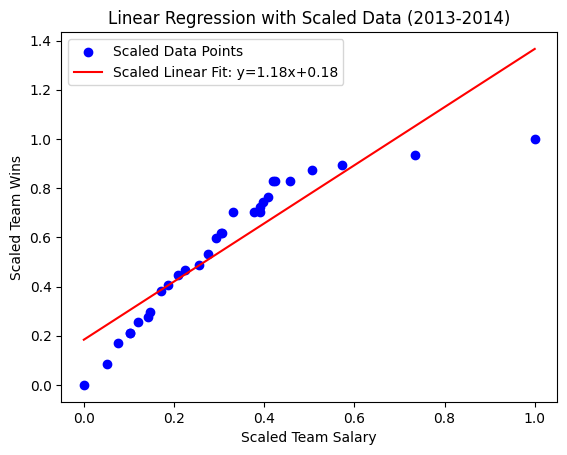

In [31]:
# raw columns, axis
x = df_sal13['2013/14(*)']  
y = df_wins13['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2013-2014)')
plt.legend()
plt.show()

#### <font color='red'>2014-2015 Season:</font> 

R-squared: 0.9752
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1102.
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           4.96e-24
Time:                        11:44:18   Log-Likelihood:                 53.384
No. Observations:                  30   AIC:                            -102.8
Df Residuals:                      28   BIC:                            -99.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.016  

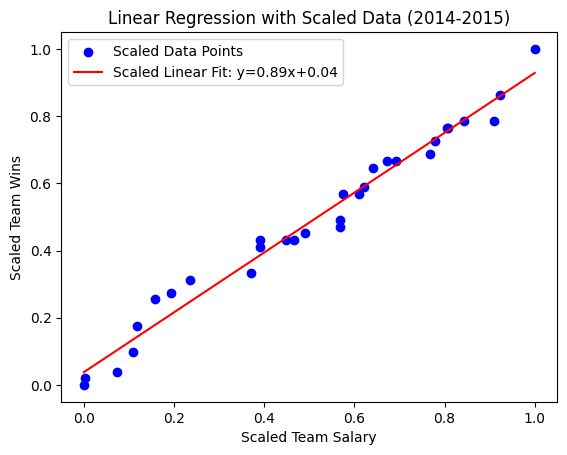

In [22]:
# raw columns, axis
x = df_sal14['2014/15(*)']  
y = df_wins14['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2014-2015)')
plt.legend()
plt.show()

#### <font color='red'>2015-2016 Season:</font> 

R-squared: 0.9286
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     364.3
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.38e-17
Time:                        11:44:34   Log-Likelihood:                 42.909
No. Observations:                  30   AIC:                            -81.82
Df Residuals:                      28   BIC:                            -79.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1701      0.020  

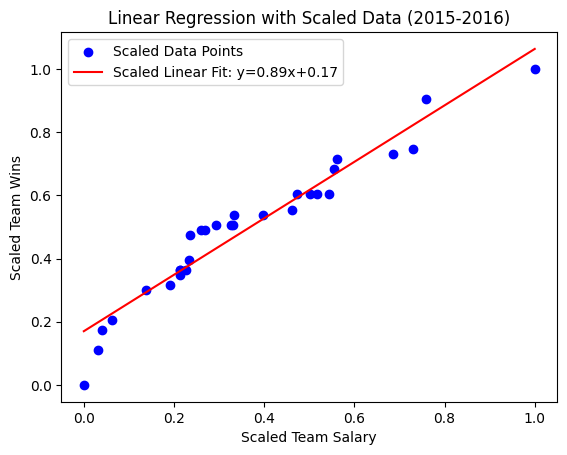

In [23]:
# raw columns, axis
x = df_sal15['2015/16(*)']  
y = df_wins15['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled)  
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2015-2016)')
plt.legend()
plt.show()

#### <font color='red'>2016-2017 Season:</font> 

R-squared: 0.9705
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     922.4
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.62e-23
Time:                        11:43:30   Log-Likelihood:                 53.870
No. Observations:                  30   AIC:                            -103.7
Df Residuals:                      28   BIC:                            -100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0633      0.015  

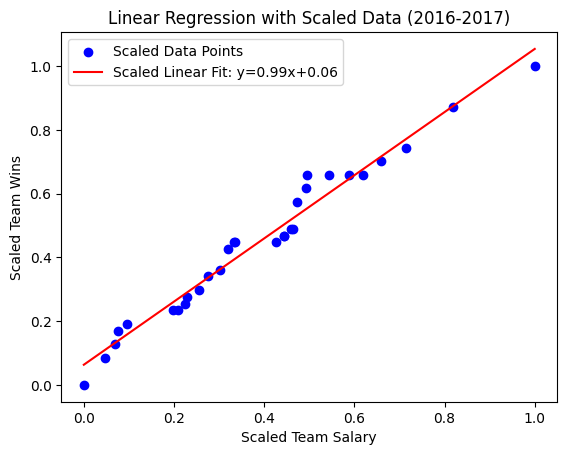

In [20]:
# raw columns, axis
x = df_sal16['2016/17(*)']  
y = df_wins16['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled)  
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2016-2017)')
plt.legend()
plt.show()

#### <font color='red'>2017-2018 Season:</font> 

R-squared: 0.9636
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     742.3
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.07e-21
Time:                        11:44:58   Log-Likelihood:                 46.087
No. Observations:                  30   AIC:                            -88.17
Df Residuals:                      28   BIC:                            -85.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0574      0.021  

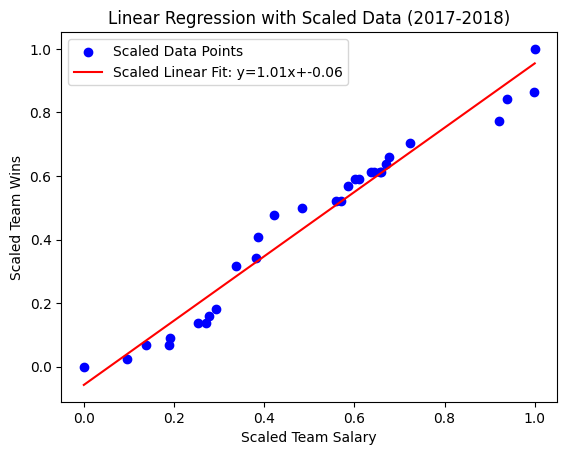

In [24]:
# raw columns, axis
x = df_sal17['2017/18(*)']  
y = df_wins17['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit() 
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2017-2018)')
plt.legend()
plt.show()

#### <font color='red'>2018-2019 Season:</font> 

R-squared: 0.8866
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           9.16e-15
Time:                        11:45:15   Log-Likelihood:                 28.814
No. Observations:                  30   AIC:                            -53.63
Df Residuals:                      28   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1467      0.051  

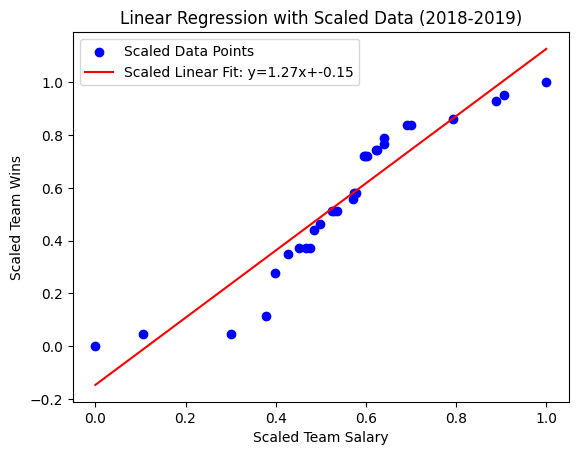

In [25]:
# raw columns, axis
x = df_sal18['2018/19(*)']  
y = df_wins18['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled)  
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2018-2019)')
plt.legend()
plt.show()

#### <font color='red'>2019-2020 Season:</font> 

R-squared: 0.9072
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     273.9
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           5.46e-16
Time:                        11:45:26   Log-Likelihood:                 30.682
No. Observations:                  30   AIC:                            -57.36
Df Residuals:                      28   BIC:                            -54.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0766      0.038  

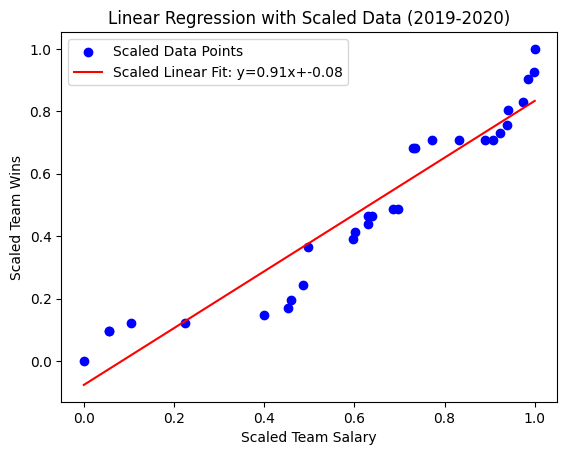

In [26]:
# raw columns, axis
x = df_sal19['2019/20(*)']  
y = df_wins19['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2019-2020)')
plt.legend()
plt.show()

#### <font color='red'>2020-2021 Season:</font> 

R-squared: 0.8053
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.86e-11
Time:                        11:45:38   Log-Likelihood:                 20.028
No. Observations:                  30   AIC:                            -36.06
Df Residuals:                      28   BIC:                            -33.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0137      0.057  

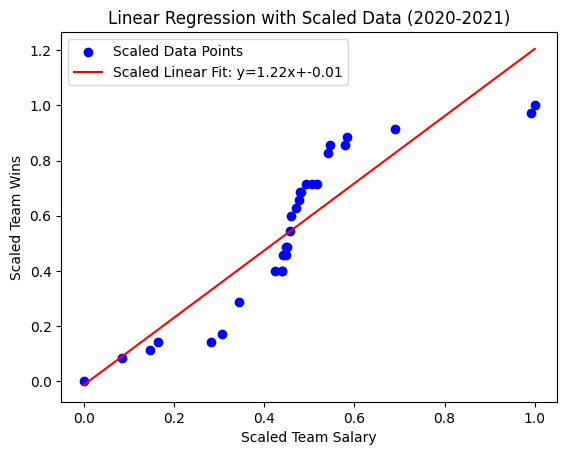

In [27]:
# raw columns, axis
x = df_sal20['2020/21(*)']  
y = df_wins20['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit()  
print(model.summary()) 

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2020-2021)')
plt.legend()
plt.show()

#### <font color='red'>2021-2022 Season:</font> 

R-squared: 0.7643
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     90.79
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           2.76e-10
Time:                        11:45:51   Log-Likelihood:                 19.699
No. Observations:                  30   AIC:                            -35.40
Df Residuals:                      28   BIC:                            -32.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1962      0.075  

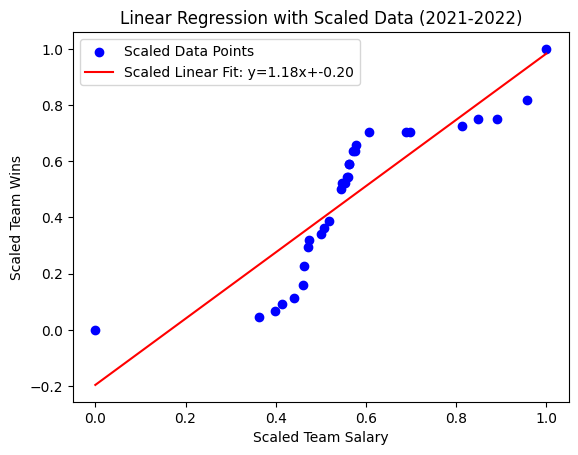

In [28]:
# raw columns, axis
x = df_sal21['2021/22(*)']  
y = df_wins21['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled) 
model = sm.OLS(y_scaled, X).fit() 
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2021-2022)')
plt.legend()
plt.show()

#### <font color='red'>2022-2023 Season:</font> 

R-squared: 0.9277
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     359.5
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.64e-17
Time:                        11:46:03   Log-Likelihood:                 39.609
No. Observations:                  30   AIC:                            -75.22
Df Residuals:                      28   BIC:                            -72.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.031  

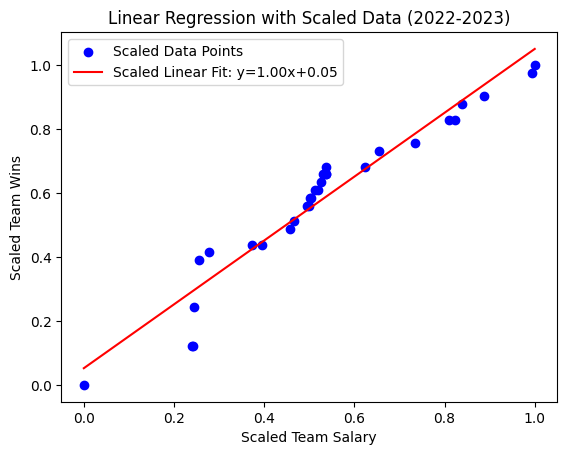

In [29]:
# raw columns, axis
x = df_sal22['2022/23(*)']  
y = df_wins22['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled)  
model = sm.OLS(y_scaled, X).fit() 
print(model.summary()) 

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2022-2023)')
plt.legend()
plt.show()

#### <font color='red'>2023-2024 Season:</font> 

R-squared: 0.8792
                            OLS Regression Results                            
Dep. Variable:                   Wins   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     203.8
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           2.23e-14
Time:                        11:46:17   Log-Likelihood:                 29.125
No. Observations:                  30   AIC:                            -54.25
Df Residuals:                      28   BIC:                            -51.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1237      0.034  

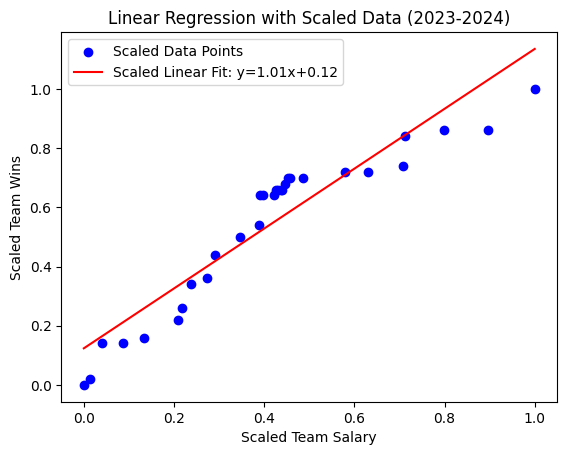

In [30]:
# raw columns, axis
x = df_sal23['2023/24(*)']  
y = df_wins23['Wins']  

# scaling x, y
x_scaled = (x - x.min()) / (x.max() - x.min())  
y_scaled = (y - y.min()) / (y.max() - y.min())  

# linreg 
m, b = np.polyfit(x_scaled, y_scaled, 1)  
y_pred_scaled = m * x_scaled + b

# calculate R²
residuals = y_scaled - y_pred_scaled
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_scaled - np.mean(y_scaled))**2)
r_squared = 1 - (ss_res / ss_tot)

# print R²
print(f'R-squared: {r_squared:.4f}')

# p-value and summary
X = sm.add_constant(x_scaled)  
model = sm.OLS(y_scaled, X).fit()  
print(model.summary())  

# plot
plt.scatter(x_scaled, y_scaled, color='blue', label='Scaled Data Points')
plt.plot(x_scaled, y_pred_scaled, color='red', label=f'Scaled Linear Fit: y={m:.2f}x+{b:.2f}')
plt.xlabel('Scaled Team Salary')
plt.ylabel('Scaled Team Wins')
plt.title('Linear Regression with Scaled Data (2023-2024)')
plt.legend()
plt.show()

#### 5.2 Linear Regression Summary

In [40]:
linreg_sum = pd.read_csv(r"C:\Users\ian\pd_project_1\linreg_summary.csv")

In [41]:
linreg_sum

,Season,R-Squared,P-Value (Intercept),P-Value (Salary)
0,2013-2014,0.8279,0.000,0
1,2014-2015,0.9752,0.022,0
2,2015-2016,0.9286,0.000,0
3,2016-2017,0.9705,0.000,0
4,2017-2018,0.9636,0.012,0
5,2018-2019,0.8866,0.007,0
6,2019-2020,0.9072,0.055,0
7,2020-2021,0.8053,0.811,0
8,2021-2022,0.7643,0.014,0
9,2022-2023,0.9277,0.099,0


##### Notes
- Team Salary P-Value is 0, or very small, for each season. Total team salary has a strong relationship with team wins in a season.
- Eight seasons (13-14, 14-15, 15-16, 16-17, 17-18, 18-19, 21-22, 23-24) have a statistically significant P-Value for the intercept.


##### Limitations
- The NBA Schedule was modifed in the 2019-2020 and 2020-2021 seasons due to COVID-19 complications, which introduced unexpected playing circumstances such as less games in the regular season, player and fan attendance, and overall season continuity.